In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import signal

In [2]:
f=np.array([[1,1,1,1],[0,10,10,1],[0,2,3,1],[0,5,15,8]])

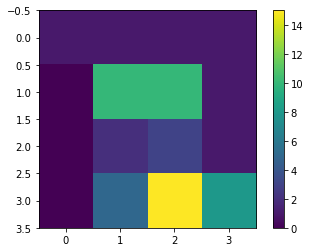

In [3]:
plt.imshow(f)
plt.colorbar()

In [4]:
#Computing gradients

sobel_x = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sobel_y = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

In [5]:
G_x = signal.correlate2d(f,sobel_x,mode='same')
G_y = signal.correlate2d(f,sobel_y,mode='same')

[[10 30 31 12]
 [-1  3  5  2]
 [-5 -5 12 19]
 [-2 -7 -9 -5]]


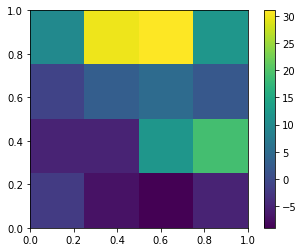

In [6]:
plt.imshow(G_x, extent=[0, 1, 0, 1])
plt.colorbar()
print(G_x)

[[ 12  10  -9 -12]
 [ 23  23 -19 -24]
 [ 19  31  -8 -31]
 [ 12  33   5 -33]]


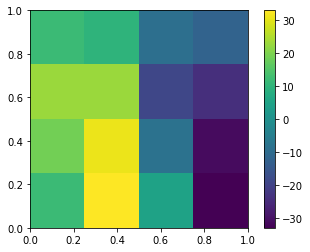

In [7]:
plt.imshow(G_y, extent=[0, 1, 0, 1])
plt.colorbar()
print(G_y)

In [8]:
M = np.abs(G_x) + np.abs(G_y)
print(M)

[[22 40 40 24]
 [24 26 24 26]
 [24 36 20 50]
 [14 40 14 38]]


In [9]:
dir_M = np.arctan2(G_y, G_x) * 180 / np.pi
print(dir_M)

[[ 50.19442891  18.43494882 -16.18920626 -45.        ]
 [ 92.48955292  82.56859203 -75.25643716 -85.23635831]
 [104.74356284  99.16234705 -33.69006753 -58.49573328]
 [ 99.46232221 101.97613244 150.9453959  -98.61564818]]


In [11]:
horiz_mask = np.logical_or(np.logical_and(dir_M<=22.5,dir_M>=-22.5),np.logical_and(dir_M>=157.5,dir_M<=-157.5))
print(horiz_mask)

[[False  True  True False]
 [False False False False]
 [False False False False]
 [False False False False]]


In [12]:
vert_mask = np.logical_or(np.logical_and(dir_M<=-67.5,dir_M>=-112.5),np.logical_and(dir_M<=112.5,dir_M>=67.5))
print(vert_mask)

[[False False False False]
 [ True  True  True  True]
 [ True  True False False]
 [ True  True False  True]]


In [13]:
plus45_mask = np.logical_or(np.logical_and(dir_M<157.5,dir_M>112.5),np.logical_and(dir_M<-22.5,dir_M>-67.5))
print(plus45_mask)

[[False False False  True]
 [False False False False]
 [False False  True  True]
 [False False  True False]]


In [14]:
minus45_mask = np.logical_or(np.logical_and(dir_M<67.5,dir_M>22.5),np.logical_and(dir_M<-112.5,dir_M>-157.5))
print(minus45_mask)

[[ True False False False]
 [False False False False]
 [False False False False]
 [False False False False]]


In [15]:
horiz_mask + vert_mask + minus45_mask + plus45_mask

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [16]:
g_n= np.zeros(M.shape)
for i in range(1,M.shape[0]-1):
    for j in range(1,M.shape[1]-1):
        if horiz_mask[i,j]:
            if (horiz_mask[i,j+1] and M[i,j] < M[i,j+1]) or (horiz_mask[i,j-1] and M[i,j] < M[i,j-1]):
                g_n[i,j] = 0
            else:
                g_n[i,j] = M[i,j]
        elif vert_mask[i,j]:
            if (vert_mask[i-1,j] and M[i,j] < M[i-1,j]) or (vert_mask[i+1,j] and M[i,j] < M[i+1,j]):
                g_n[i,j] = 0
            else:
                g_n[i,j] = M[i,j]
        
        elif plus45_mask[i,j]:
            if (plus45_mask[i-1,j-1] and M[i,j] < M[i-1,j-1]) or (plus45_mask[i+1,j+1] and M[i,j] < M[i+1,j+1]):
                g_n[i,j] = 0
            else:
                g_n[i,j] = M[i,j]
        elif minus45_mask[i,j]:
            if (minus45_mask[i-1,j+1] and M[i,j] < M[i-1,j+1]) or (minus45_mask[i+1,j-1] and M[i,j] < M[i+1,j-1]):
                g_n[i,j] = 0
            else:
                g_n[i,j] = M[i,j]

In [17]:
g_n

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0., 24.,  0.],
       [ 0.,  0., 20.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [18]:
#Hysterisis thresholding

In [19]:
horiz_mask = np.logical_or(np.logical_and(dir_M<=22.5,dir_M>=-22.5),np.logical_and(dir_M>=157.5,dir_M<=-157.5))
print(horiz_mask)
vert_mask = np.logical_or(np.logical_and(dir_M<=-67.5,dir_M>=-112.5),np.logical_and(dir_M<=112.5,dir_M>=67.5))
print(vert_mask)
plus45_mask = np.logical_or(np.logical_and(dir_M<157.5,dir_M>112.5),np.logical_and(dir_M<-22.5,dir_M>-67.5))
print(plus45_mask)
minus45_mask = np.logical_or(np.logical_and(dir_M<67.5,dir_M>22.5),np.logical_and(dir_M<-112.5,dir_M>-157.5))
print(minus45_mask)
g_n= np.zeros(M.shape)
for i in range(1,M.shape[0]-1):
    for j in range(1,M.shape[1]-1):
        if horiz_mask[i,j]:
            if M[i,j] < M[i,j+1] or M[i,j] < M[i,j-1]:
                g_n[i,j] = 0
            else:
                g_n[i,j] = M[i,j]
        elif vert_mask[i,j]:
            if M[i,j] < M[i-1,j] or M[i,j] < M[i+1,j]:
                g_n[i,j] = 0
            else:
                g_n[i,j] = M[i,j]
        
        elif plus45_mask[i,j]:
            if M[i,j] < M[i-1,j-1] or M[i,j] < M[i+1,j+1]:
                g_n[i,j] = 0
            else:
                g_n[i,j] = M[i,j]
        elif minus45_mask[i,j]:
            if M[i,j] < M[i-1,j+1] or M[i,j] < M[i+1,j-1]:
                g_n[i,j] = 0
            else:
                g_n[i,j] = M[i,j]

[[False  True  True False]
 [False False False False]
 [False False False False]
 [False False False False]]
[[False False False False]
 [ True  True  True  True]
 [ True  True False False]
 [ True  True False  True]]
[[False False False  True]
 [False False False False]
 [False False  True  True]
 [False False  True False]]
[[ True False False False]
 [False False False False]
 [False False False False]
 [False False False False]]


In [20]:
g_n

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [21]:
import cv2
import numpy as np
f=np.array([[1,1,1,1],[0,10,10,1],[0,2,3,1],[0,5,15,8]])
edges = cv2.Canny(np.uint8(f),36,12)


In [22]:
f

array([[ 1,  1,  1,  1],
       [ 0, 10, 10,  1],
       [ 0,  2,  3,  1],
       [ 0,  5, 15,  8]])

In [23]:
edges

array([[  0, 255, 255,   0],
       [  0, 255,   0,   0],
       [  0, 255,   0, 255],
       [  0, 255, 255, 255]], dtype=uint8)

In [24]:
g_n

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [40]:
t_l=30/100 * np.max(M.ravel())
t_h=90/100 * np.max(M.ravel())

In [41]:
g_nh = np.zeros(g_n.shape)
g_nl = np.zeros(g_n.shape)

In [43]:
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        if g_n[i,j] >= t_h:
            g_nh[i,j] = 1
        else:
            g_nh[i,j] = 0
        
        if g_n[i,j] >= t_l:
            g_nl[i,j] = 1
        else:
            g_nl[i,j] = 0

In [44]:
g_nl

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [45]:
g_nh

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])